In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autism-prediction/Autism-prediction/sample_submission.csv
/kaggle/input/autism-prediction/Autism-prediction/train.csv
/kaggle/input/autism-prediction/Autism-prediction/test.csv


In [181]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [117]:
train=pd.read_csv("/kaggle/input/autism-prediction/Autism-prediction/train.csv")
test=pd.read_csv("/kaggle/input/autism-prediction/Autism-prediction/test.csv")

In [118]:
train.head(10)



,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
5,6,1,0,0,0,0,0,0,1,0,...,m,Asian,no,no,Nicaragua,no,7.445003,18 and more,?,0
6,7,1,1,1,1,1,1,0,1,0,...,f,White-European,no,no,Canada,no,12.598583,18 and more,Self,0
7,8,0,0,0,0,0,0,0,0,0,...,m,Middle Eastern,yes,no,United Arab Emirates,no,3.525720,18 and more,?,0
8,9,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,no,United Kingdom,no,11.902461,18 and more,Self,1
9,10,0,0,0,0,0,0,1,1,0,...,f,?,yes,no,United States,no,8.633346,18 and more,Self,1


In [119]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [121]:
train["Class/ASD"].value_counts()
#train.relation.value_counts()

0    615
1    185
Name: Class/ASD, dtype: int64

In [122]:
train.replace({"gender":{"m":0,"f":1}},inplace=True)
train.replace({"jaundice":{"yes":0,"no":1}},inplace=True)
train.replace({"austim":{"yes":0,"no":1}},inplace=True)


In [123]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,1,White-European,1,1,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,1,South Asian,1,1,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,1,White-European,1,1,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,1,South Asian,1,1,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,0,Black,1,0,Italy,no,7.949723,18 and more,Self,0


In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    int64  
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    int64  
 15  austim           800 non-null    int64  
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [125]:
x=train.drop(['ethnicity','contry_of_res','used_app_before','age_desc','relation','Class/ASD'],axis=1)
y=train['Class/ASD']

In [126]:
print(y)
print(x)

0      0
1      0
2      1
3      0
4      0
      ..
795    1
796    0
797    1
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64
      ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         1         1         1   
1      2         0         0         0         0         0         0   
2      3         1         1         1         1         1         1   
3      4         0         0         0         1         0         0   
4      5         0         0         0         0         1         0   
..   ...       ...       ...       ...       ...       ...       ...   
795  796         1         1         1         1         1         1   
796  797         1         1         0         0         1         0   
797  798         0         0         0         0         0         0   
798  799         1         1         1         1         1         1   
799  800         1         0         0         1         1        

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [128]:
model=LogisticRegression(max_iter=1000)

In [129]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [130]:
x_train_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)

In [131]:
ytrain=y_train.values
print(ytrain)

[1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 

In [132]:
y_train.value_counts()

0    434
1    126
Name: Class/ASD, dtype: int64

In [133]:
print(x_train_predict)

[1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 1 

In [134]:
x_train_predict_series = pd.Series(x_train_predict)
print(x_train_predict_series)

0      1
1      0
2      1
3      0
4      1
      ..
555    0
556    0
557    0
558    1
559    0
Length: 560, dtype: int64


In [135]:
x_train_predict_series.value_counts()

0    446
1    114
dtype: int64

In [136]:
print('{0:2f}%'.format(training_data_accuracy*100))

89.642857%


In [137]:
x_test_predict=model.predict(x_test)
print(x_test_predict)

[0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [138]:
report_lr=classification_report(x_test_predict,y_test)
print(report_lr)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       184
           1       0.68      0.71      0.70        56

    accuracy                           0.85       240
   macro avg       0.79      0.81      0.80       240
weighted avg       0.86      0.85      0.86       240



In [139]:
ytest=y_test.values
print(ytest)

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]


In [140]:
testing_data_accuracy=accuracy_score(x_test_predict,y_test)

In [141]:
print('{0:2f}%'.format(testing_data_accuracy*100))

85.416667%


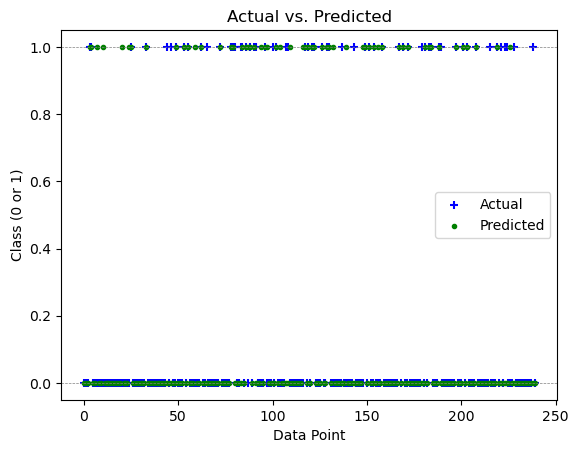

In [142]:
plt.scatter(np.arange(len(ytest)), ytest, color='blue', label='Actual',marker='+')
plt.scatter(np.arange(len(x_test_predict)), x_test_predict, color='green', label='Predicted', marker='.')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Data Point')
plt.ylabel('Class (0 or 1)')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [143]:
# USING DECISION TREE FOR CLASSIFICATION
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree

In [144]:
clf=DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [145]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [146]:
x_dt_predict=clf.predict(x_test)
print(x_dt_predict)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [147]:
testing_dt_accuracy=accuracy_score(x_dt_predict,y_test)
print('{0:2f}%'.format(testing_dt_accuracy*100))

83.750000%


In [148]:
report = classification_report(y_test,x_dt_predict)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       181
           1       0.68      0.64      0.66        59

    accuracy                           0.84       240
   macro avg       0.78      0.77      0.78       240
weighted avg       0.83      0.84      0.84       240



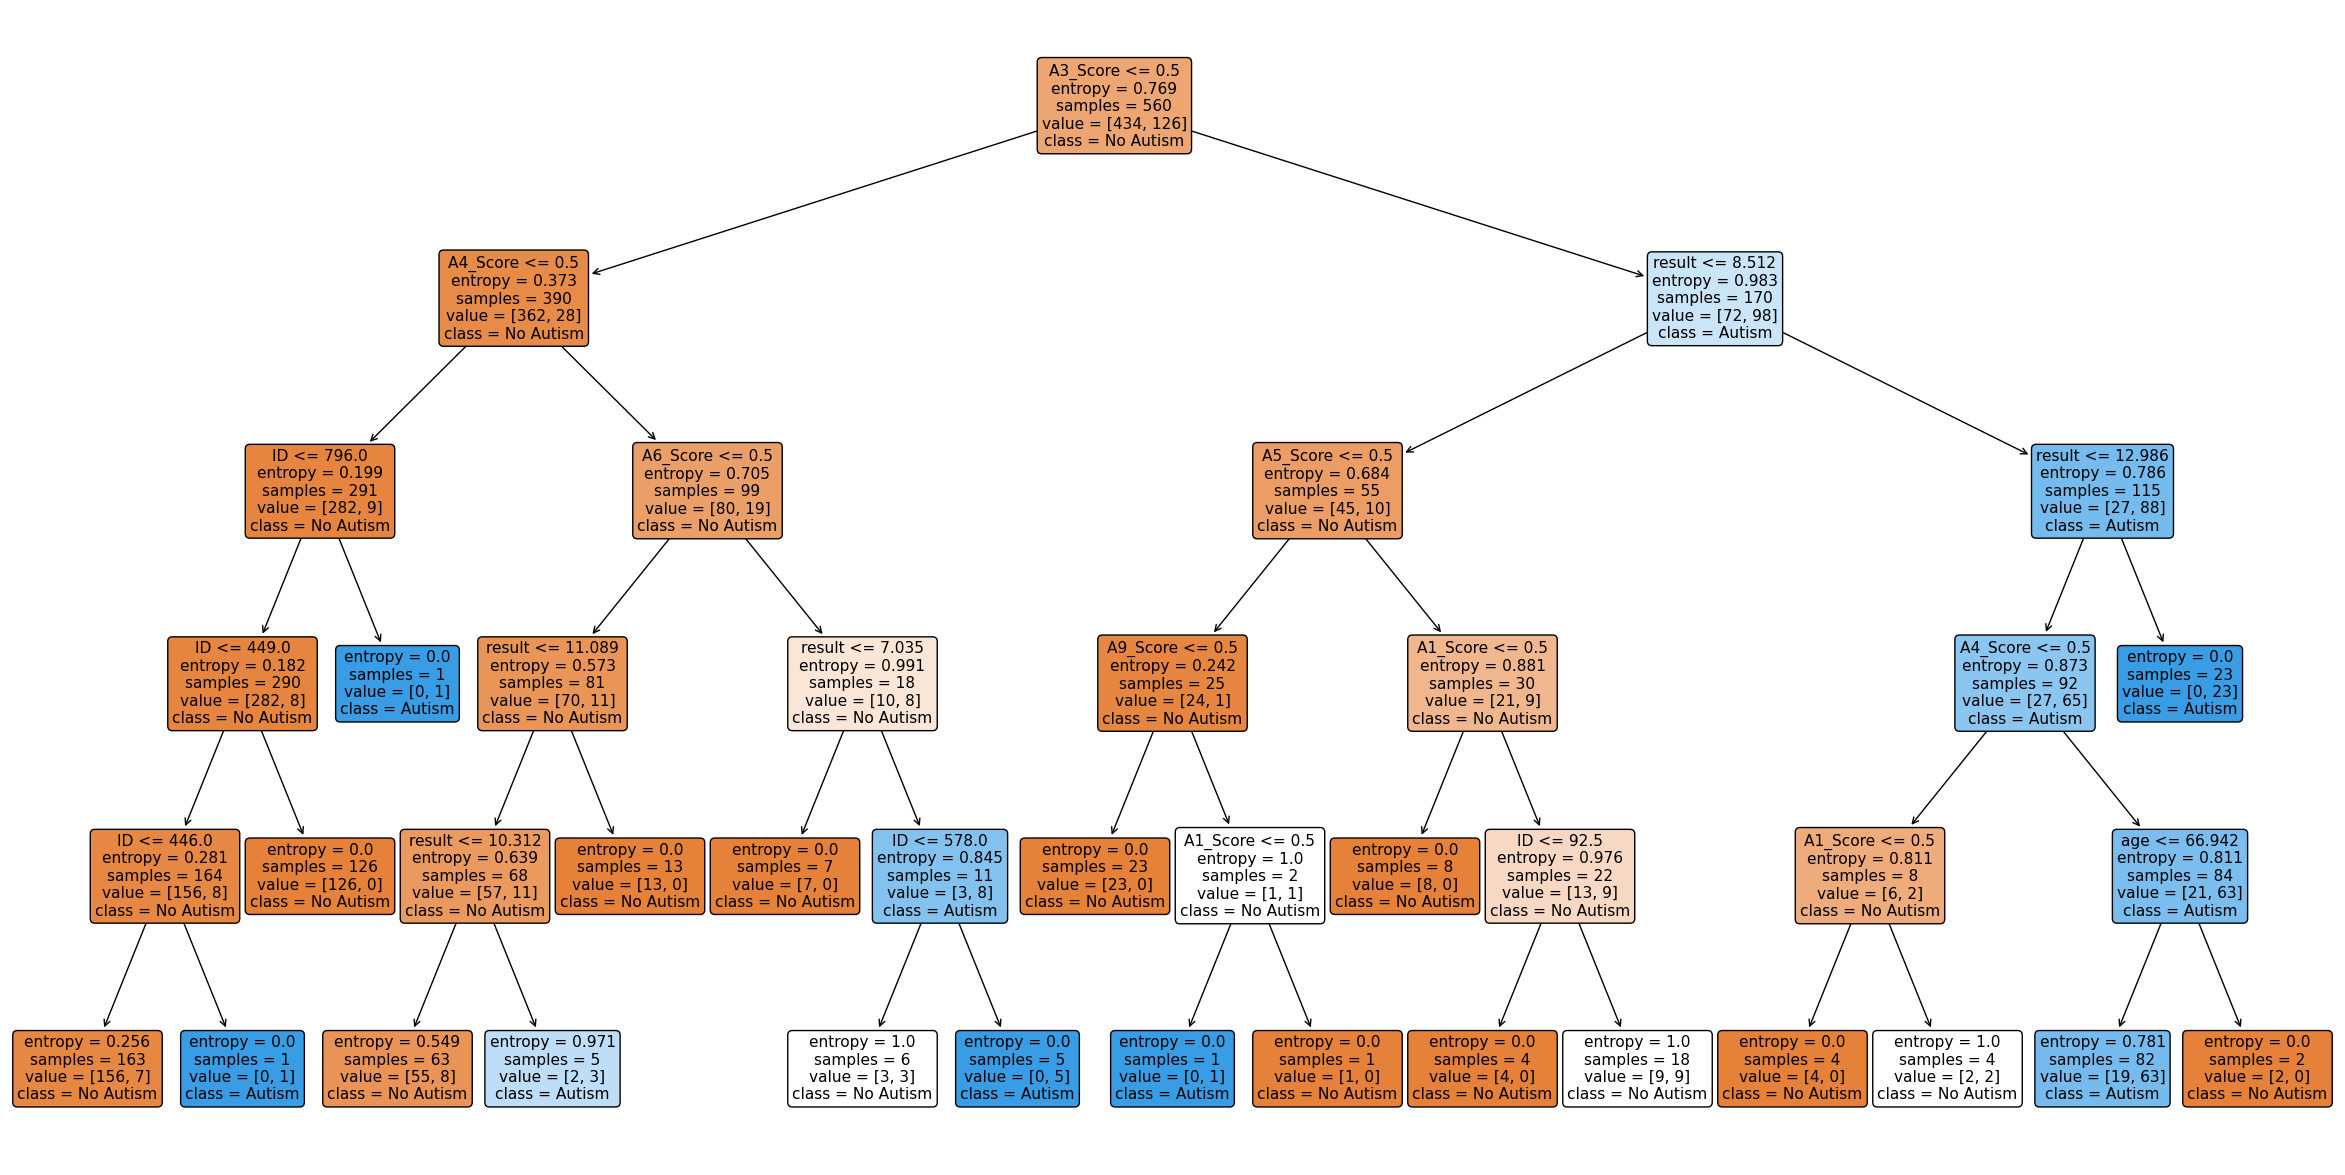

In [149]:
plt.figure(figsize=(30, 15))
plot_tree(clf, feature_names=x.columns, class_names=["No Autism", "Autism"], filled=True, rounded=True)
plt.show()

In [150]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [151]:
RFC=RandomForestClassifier()

In [152]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [166]:
x_rfc_predict=RFC.predict(x_test)
print(x_rfc_predict)

[0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [154]:
test_rfc_accuracy=accuracy_score(x_rfc_predict,y_test)
print('{0:2f}%'.format(test_rfc_accuracy*100))

85.000000%


In [155]:
report_rfc=classification_report(x_rfc_predict,y_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       187
           1       0.64      0.72      0.68        53

    accuracy                           0.85       240
   macro avg       0.78      0.80      0.79       240
weighted avg       0.86      0.85      0.85       240



In [156]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

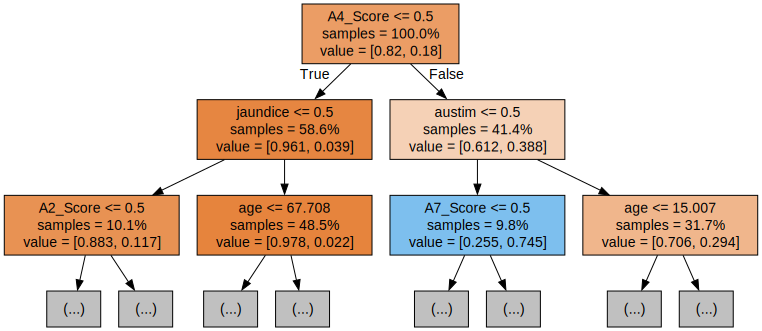

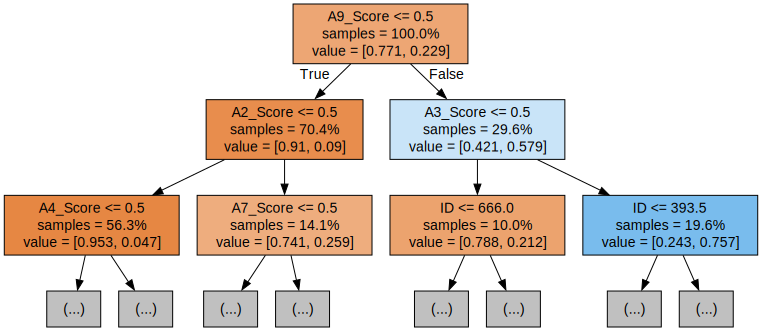

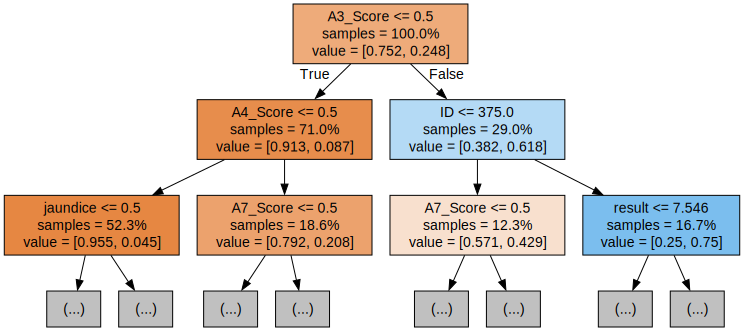

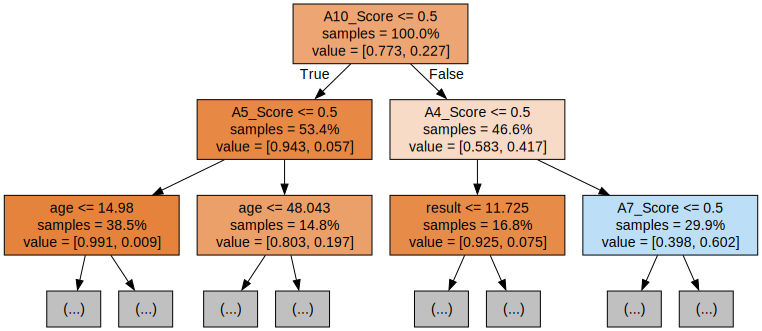

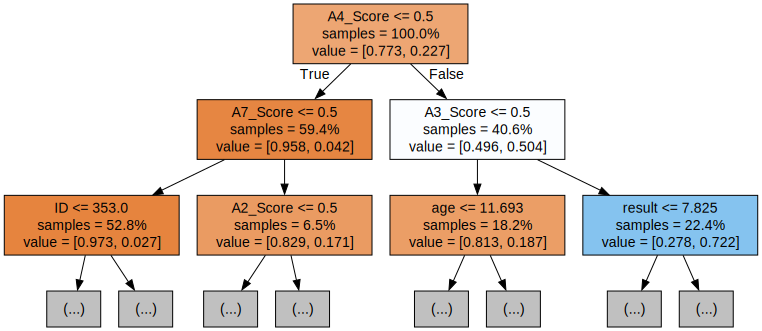

In [157]:
for i in range(5):
    tree = RFC.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [158]:
#tuning randomforestclassifier
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(RFC, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7a5e153eee90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7a5e153ecfa0>})

In [159]:
best_rf = rand_search.best_estimator_
print(best_rf)

RandomForestClassifier(max_depth=13, n_estimators=323)


In [160]:
rand_search.best_params_

{'max_depth': 13, 'n_estimators': 323}

In [167]:
x_rand_predict=rand_search.predict(x_test)
print(x_rand_predict)

[0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [162]:
test_rand_accuracy=accuracy_score(x_rand_predict,y_test)
print('{0:2f}%'.format(test_rand_accuracy*100))

85.416667%


In [163]:
report_rand=classification_report(x_rand_predict,y_test)
print(report_rand)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       186
           1       0.66      0.72      0.69        54

    accuracy                           0.85       240
   macro avg       0.79      0.81      0.80       240
weighted avg       0.86      0.85      0.86       240



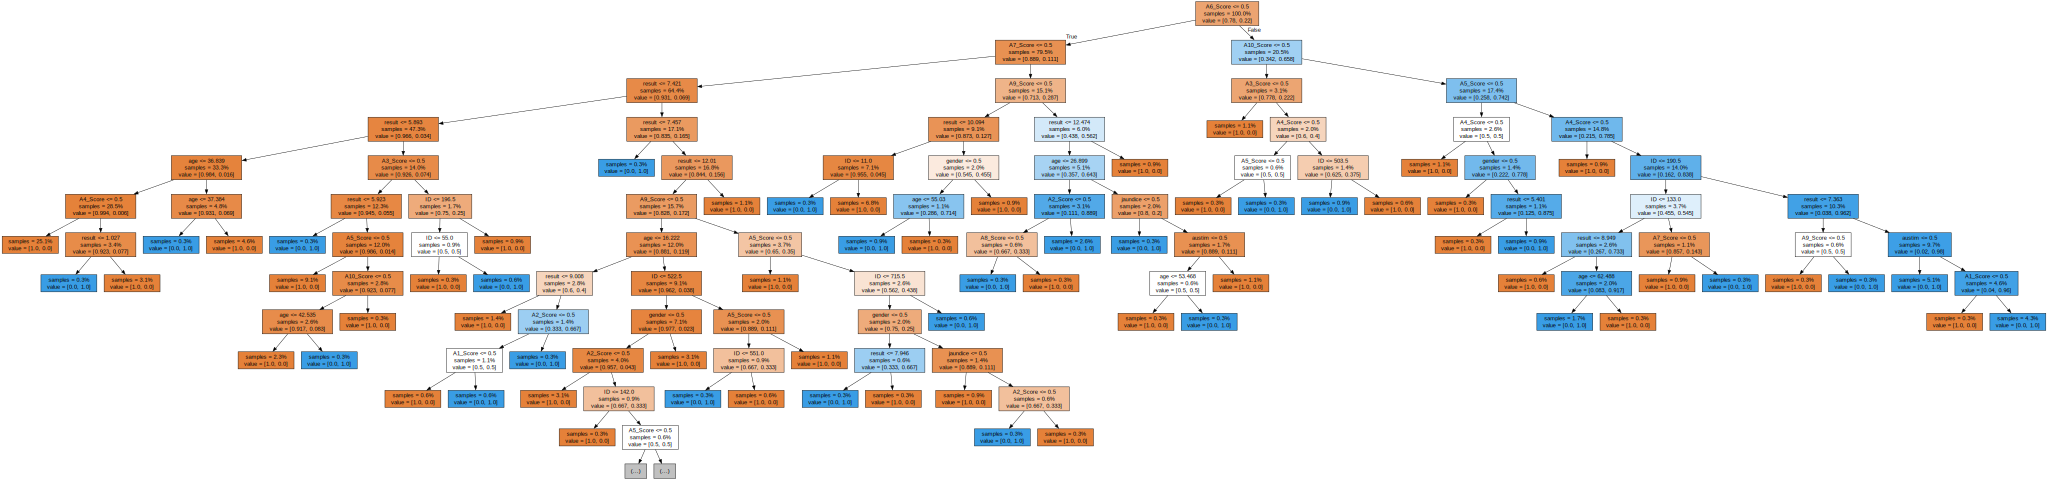

In [165]:
tree_index = 0 
chosen_tree = best_rf.estimators_[tree_index]
dot_data = export_graphviz(chosen_tree,feature_names=x_train.columns,filled=True,max_depth=11,impurity=False,proportion=True)
graph = graphviz.Source(dot_data)
display(graph)